# Toxic Comment Classification Challenge


## Ana Petrović 1073/2020

### Zadatak

#### Multilabelarna klasifikacija teksta
- Napraviti model koji može da razvrsta tekstualne komentare prema svojoj uvredljivosti/toksičnosti (toxic, severe_toxic, obscene, threat, insult, identity_hate)

#### Podeljen na dva dela:
 1. Binarna klasifikacija na toksične (1) i netoksične (0) na svim podacima
 2. Multilabelarna klasifikacija samo toksičnih komentara na samo toksičnim podacima (oko 10% ukupnog skupa)

### Podaci

- Velika količina komentara sa stranice Vikipedije (oko 223000), koje su ljudski korisnici ocenjivali kao toksične
- Primer komentara (klase toxic i insult):

"Hey listen don't you ever!!!! Delete my edits ever again I'm annoyed because the WWE 2K15 a few of the roster have been confirmed and your stupid ass deletes what I write. just stop!!!! Please STOP!!!! You don't work 2k or WWE games so stop deleting other peoples shit if I get it wrong or others get it wrong let them they will get the hang of it eventually but don't stick your most ass in their and I'm gonna delete the ""please do not insert the roster"" shit how do you not have it if has been confirmed!!!!! God your stupid."


- toxic           : 1
- severe_toxic    : 0
- obscene         : 0
- threat          : 0
- insult          : 1
- identity_hate   : 0


- Najzastupljenije reči u označenim instancama

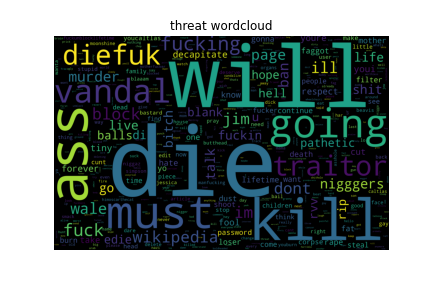

### Problem: nebalansiranost klasa

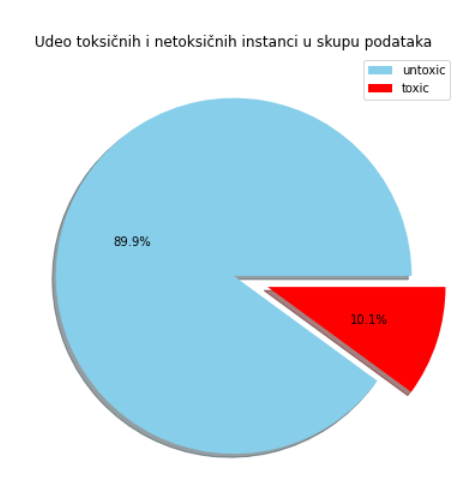

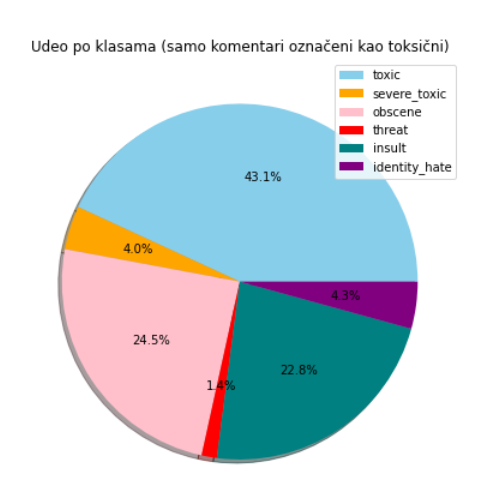

### Rešenje: 

#### 1.   Binarna klasifikacija sa težinama na toksične i netoksične komentare
#### 2.   Multilabelarna klasifikacija sa težinama toksičnih komentara


### Priprema teksta

- Izbačeni su svi nepotrebni karakteri, razmaci, prazni komentari
- Kreiran vokabular dužine 20000 reči, a svaka instanca ograničena na 100 reči
- Reprezentacija teksta: pretrenirani vektori - GloVe
- Ugnježdavanje u semantički prostor pomoću Embedding sloja

### Model

- Zasnovan na jednodimenzionim konvolutivnim neuronskim mrežama
- Dve iteracije konvolutivnog i agregacionog sloja sa relu aktivacionim funkcijama
- Dropout regularizacija
- Parametri poput filtera i veličine kernela određeni unakrsnom validacijom (nasumičnih 5 kombinacija)
- Izlazni sloj: 1 ili 6 jedinica, sigmoidna aktivaciona funkcija
- Metrike: preciznost, odziv, f1 mera
- Dodela težina klasama - veću težinu ima klasa 1 

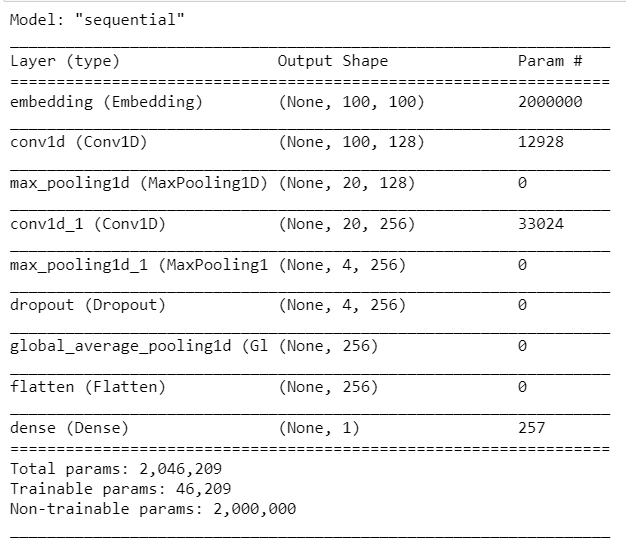

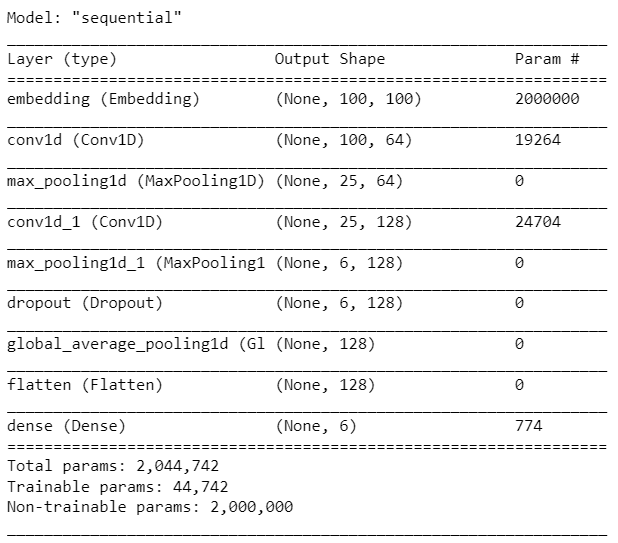

####  Rezultati - binarni klasifikator

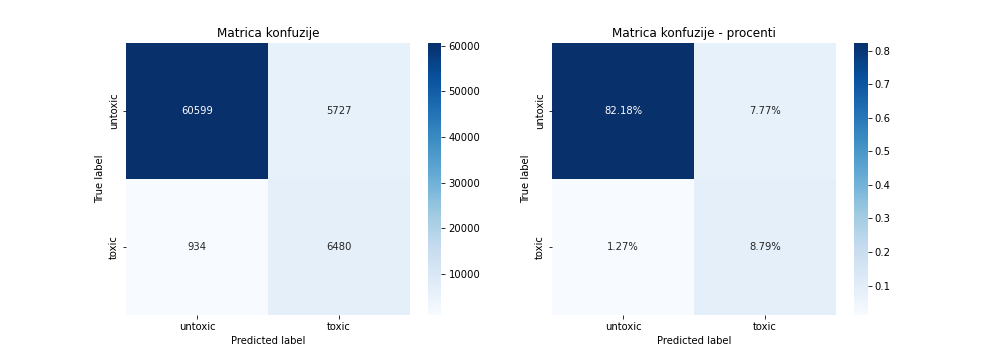

- Od oko 90% procenata netoksičnih, 82.18% je tačno klasifikovano(TN), a 7.77% netačno(FP)
- Od oko 10% procenata toksičnih komentara, 8.79% je tačno klasifikovano(TP), a 1.27% netačno(FN)
- Niža preciznost zarad višeg odziva

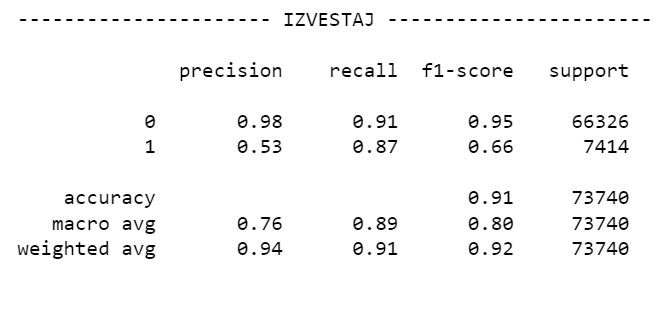

 
### Kada model greši?

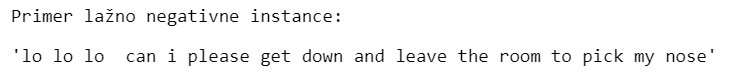

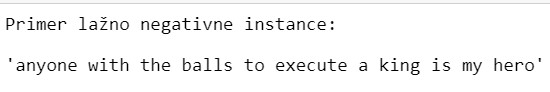

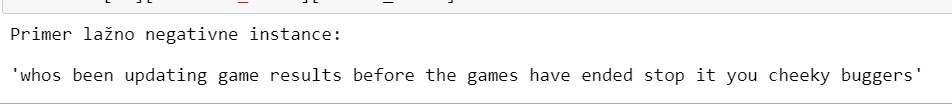

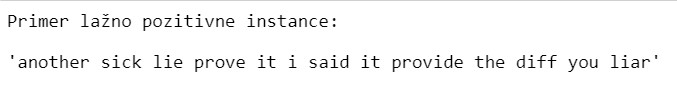

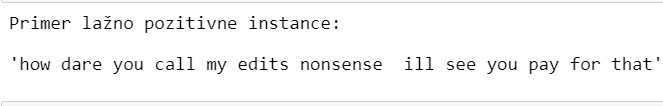

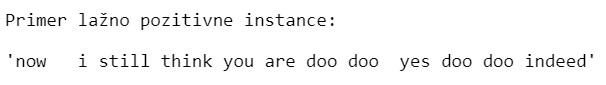

- ponašanje modela na novim izmišljenim instacama

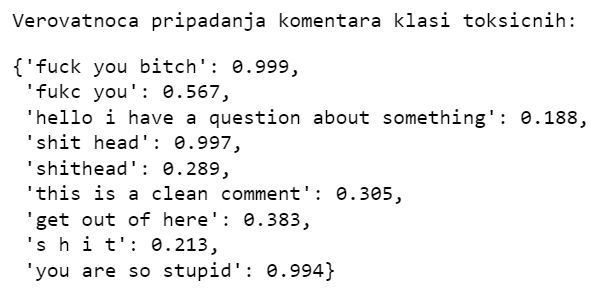

## Rezultati - multilabel klasifikator

- primenjen na oko 22000 komentara (od ukupnih 223000)
- glavni pristup: dodeljivanje težina klasama
- dodatno isprobano:
    - jednostavna augmentacija manjinske klase
    - izbacivanje najzastupljenije klase toxic 

### Model 1 (osnovni):

- klasama dodeljene težine - threat ima najveću, zatim severe_toxic i identity_hate
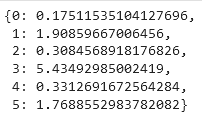

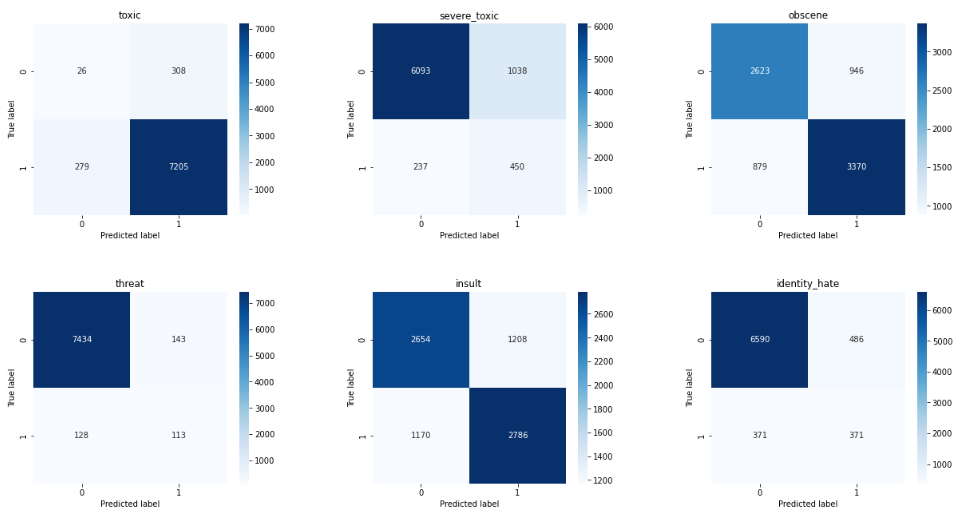

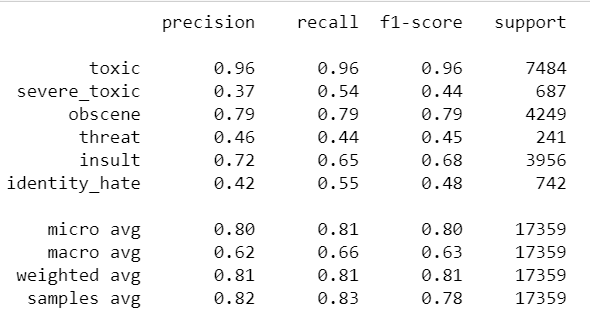

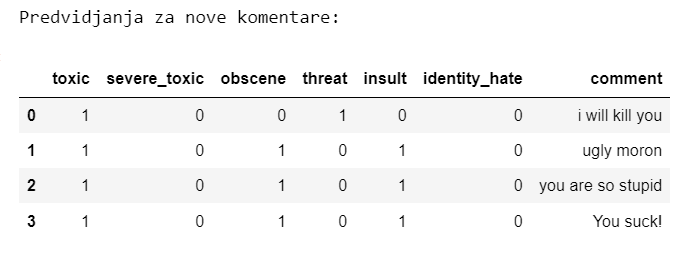

### Model 2:
- korišćena biblioteka **nlpaug** za uvećavanje klasa threat, severe_toxic i identity_hate 
- KeyboardAug, RandomWordAug, OCRAug, SynonymAug
- kreiraju se nove veštačke instance tako što  se reči menjaju sličnim ili napisanim sa greškom u kucanju, brišu nasumično i sl.

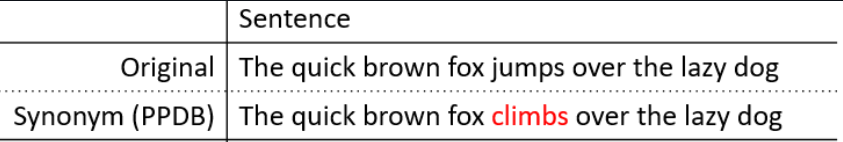

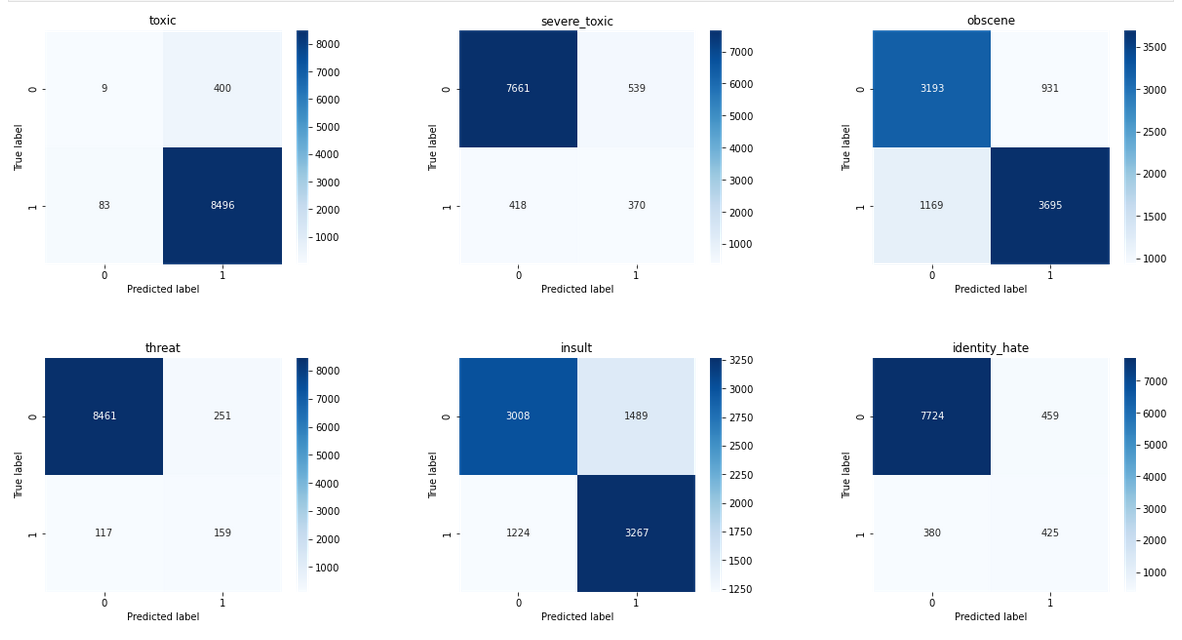

### Model 3:
- model bez klase toxic, izbačeno je oko 7500 instanci
- ideja: instance su svakako uvredljive, može se smatrati da sve pripadaju ovoj klasi
- brišu se instance koje pripadaju samo klasi toxic, a nijednoj drugoj od ostalih 5

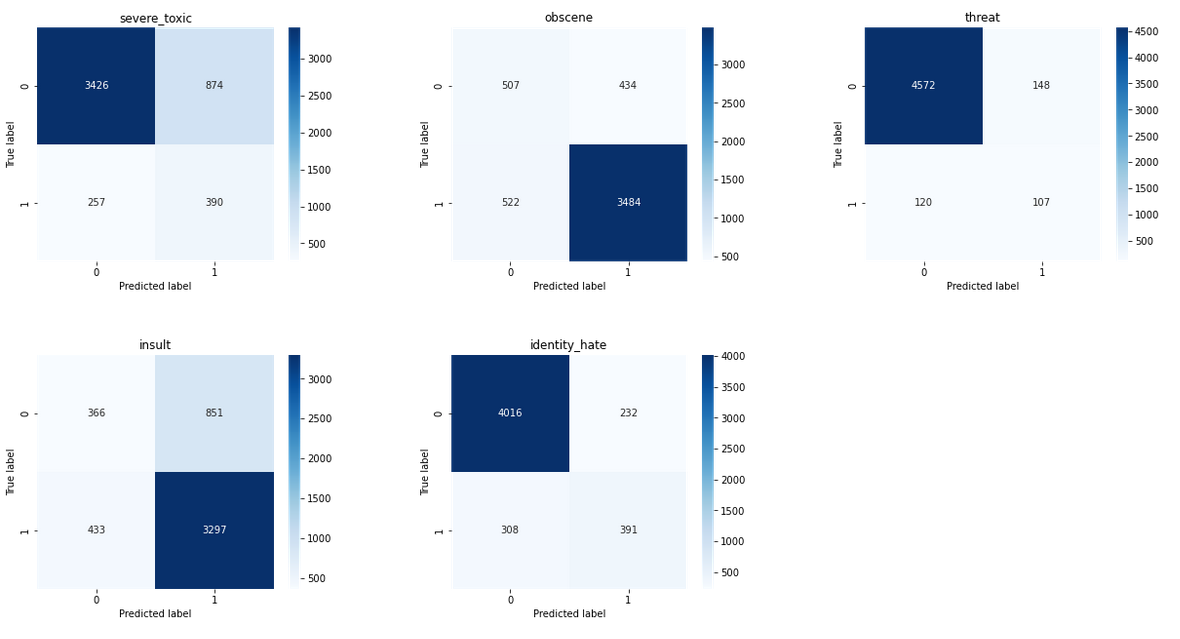

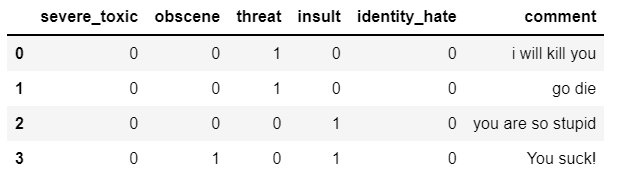

### Poređenje multilabel modela

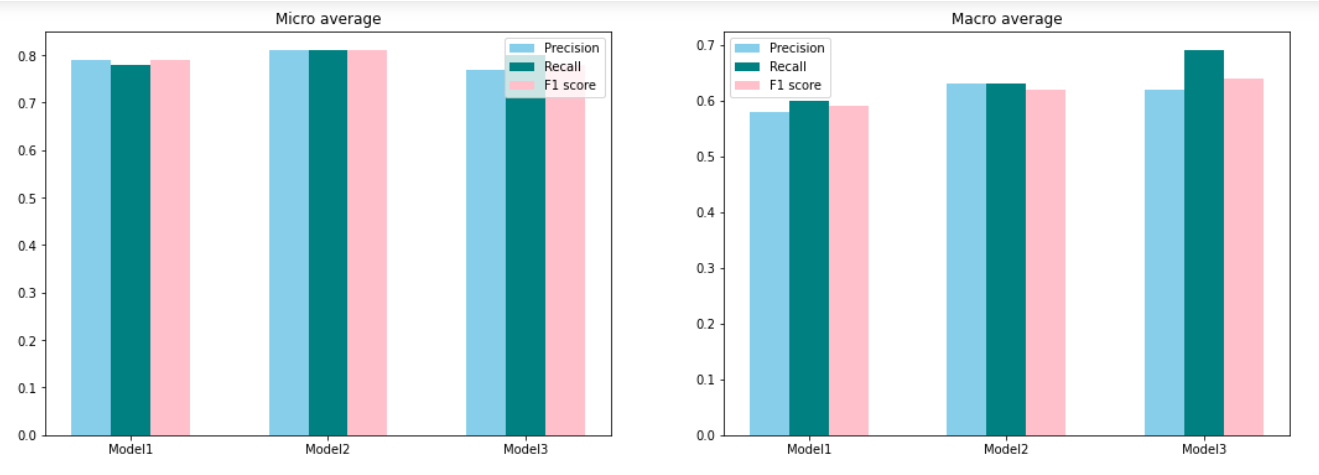


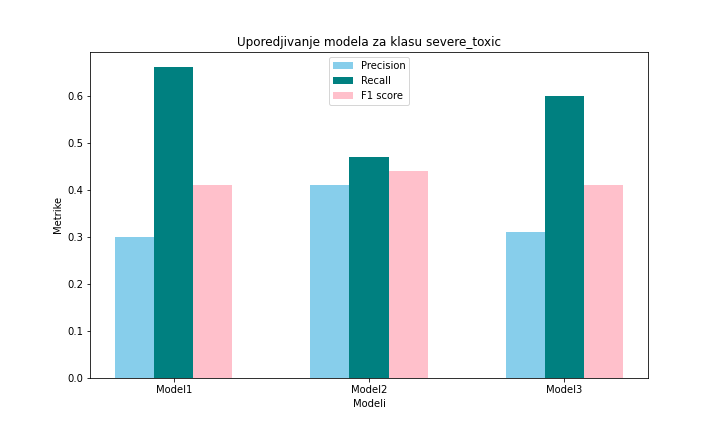


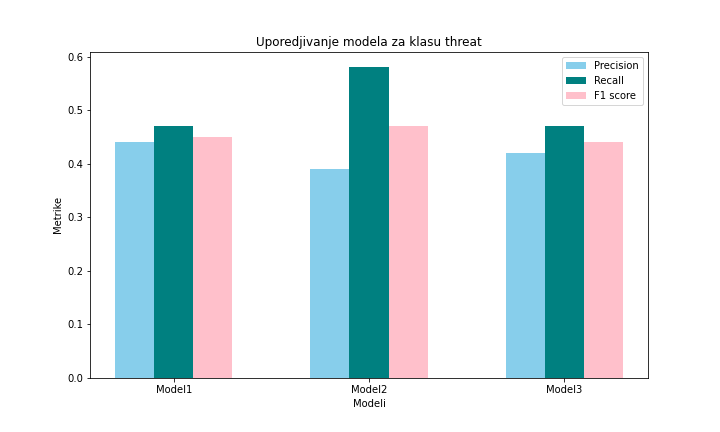

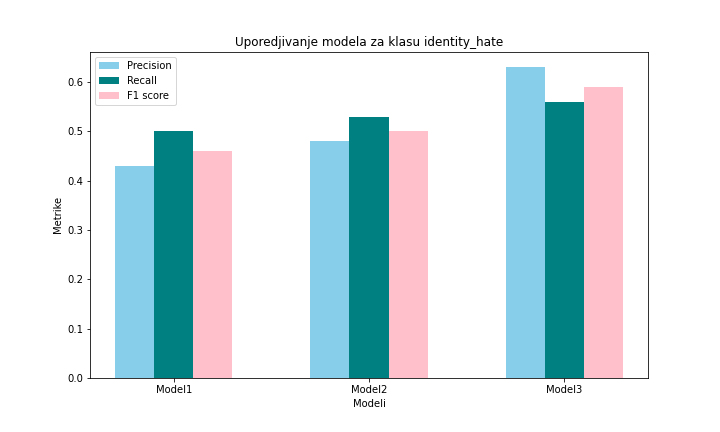

## Zaključak

- binarni model dobro klasifikuje toksične komentare
    - poboljšanje: u pripremi teksta
    
- multilabel modeli ne klasifikuju dobro, posebno na manje zastupljenim klasama
- izbacivanje većinske klase toxic dovodi do većeg odziva kod manjinskih klasa
- augmentacija je poboljšala odziv jedino za klasu threat 
    - poboljšanje: koristiti druge augmentatatore i veće količine augmentovanih podataka
- klase insult, obscene i identity_hate najbolje se pogađaju kada se izbaci klasa toxic (model3)


Teško je zaključiti kako se toksične klase preklapaju i po čemu se razlikuju, samim tim teško je tačno odrediti koje labele i koliko ih dodeliti određenom uvredljivom komentaru

# Hvala na pažnji! 